<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/useful/newsapi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install newsapi-python
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00


In [2]:
from newsapi import NewsApiClient
api_key = '6147ad35d10843b2949edc41cd955155'
api = NewsApiClient(api_key=api_key)

In [64]:
import pandas as pd

headline_df = api.get_top_headlines(country='us', page_size=100)
headline_df = pd.DataFrame(headline_df['articles'])

In [65]:
headline_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'CBS Sports'}",,USMNT stock watch: Brandon Vazquez trending in...,Vazquez is quickly cementing himself as the ma...,https://www.cbssports.com/soccer/news/usmnt-st...,https://sportshub.cbsistatic.com/i/r/2023/06/2...,2023-06-26T06:02:00Z,While the Gold Cup is a tricky tournament that...
1,"{'id': 'financial-times', 'name': 'Financial T...",George Russell,Live news: Russia posts first video of defence...,,https://www.ft.com/content/75f921f8-ca83-40fc-...,https://www.ft.com/__origami/service/image/v2/...,2023-06-26T05:42:25Z,"UK defence: General Sir Patrick Sanders, chief..."
2,"{'id': None, 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Greek elections: Mitsotakis hails conservative...,Kyriakos Mitsotakis says his party is now the ...,https://www.bbc.com/news/world-europe-65997486,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-06-26T05:36:04Z,Greek conservative leader Kyriakos Mitsotakis ...
3,"{'id': 'the-wall-street-journal', 'name': 'The...",David Wainer,Pill for Obesity Has Wall Street Salivating - ...,Obesity treatments are currently limited to in...,https://www.wsj.com/articles/pill-for-obesity-...,https://images.wsj.net/im-804363/social,2023-06-26T04:01:00Z,None
4,"{'id': 'financial-times', 'name': 'Financial T...","Courtney Weaver, Max Seddon",Vladimir Putin's generals vulnerable despite s...,Defence minister and army chief seen as ‘lame ...,https://www.ft.com/content/9668a102-68e8-4752-...,https://www.ft.com/__origami/service/image/v2/...,2023-06-26T04:00:38Z,There was no sound on the brief video of Serge...
5,"{'id': None, 'name': 'pgatour.com'}",Rob Bolton,Travelers Championship Payouts and Points: Kee...,Playing for $3.6 million of a record purse of ...,https://www.pgatour.com/article/news/betting-d...,https://res.cloudinary.com/pgatour-prod/w_1200...,2023-06-26T03:42:09Z,Playing for $3.6 million of a record purse of ...
6,"{'id': None, 'name': 'BBC News'}",https://www.facebook.com/bbcnews,PwC Australia: Accounting giant splits busines...,The accounting giant will sell its Australian ...,https://www.bbc.com/news/business-66016270,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-06-26T03:41:04Z,PwC Australia says it will sell its government...
7,"{'id': None, 'name': 'Yahoo Entertainment'}",Yongchang Chin,Oil Fluctuates After Russia Mutiny Rattles Key...,(Bloomberg) -- Oil advanced as investors weigh...,https://finance.yahoo.com/news/oil-advances-in...,https://s.yimg.com/ny/api/res/1.2/Z9nh7ED9VzgZ...,2023-06-26T03:26:00Z,(Bloomberg) -- Oil advanced as investors weigh...
8,"{'id': 'cbs-news', 'name': 'CBS News'}",Laura Haefeli,"""Remain vigilant"": 3 elderly people stabbed to...",The Nonantum neighborhood of Newton is on high...,https://www.cbsnews.com/boston/news/3-elderly-...,https://assets3.cbsnewsstatic.com/hub/i/r/2023...,2023-06-26T03:12:00Z,NEWTON - The Nonantum neighborhood of Newton i...
9,"{'id': 'usa-today', 'name': 'USA Today'}",", USA TODAY",Patti LaBelle powers through lyric mishap duri...,Patti LaBelle honored the late Queen of Rock T...,https://www.usatoday.com/story/entertainment/t...,https://www.gannett-cdn.com/presto/2023/06/26/...,2023-06-26T02:38:22Z,"The BET Awards may be hip-hop's biggest night,..."


In [56]:
headline_df['date'] = pd.to_datetime(headline_df['publishedAt'])
headline_df['date'] = headline_df['date'].dt.floor('H')

KeyError: ignored

In [ ]:
headline_df

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
import re

In [114]:
analyzer = SentimentIntensityAnalyzer()

# Vader Polarity
headline_df = pd.concat([headline_df, pd.DataFrame([analyzer.polarity_scores(text) for text in headline_df['title']])], axis=1)

# TextBlob Sebjectivity
headline_df['subjectivity'] = [TextBlob(text).sentiment.subjectivity for text in headline_df['title']]
headline_df = headline_df.fillna(0)

<ipython-input-115-465435b4aaae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trend_df = headline_df.groupby(by='date').mean()


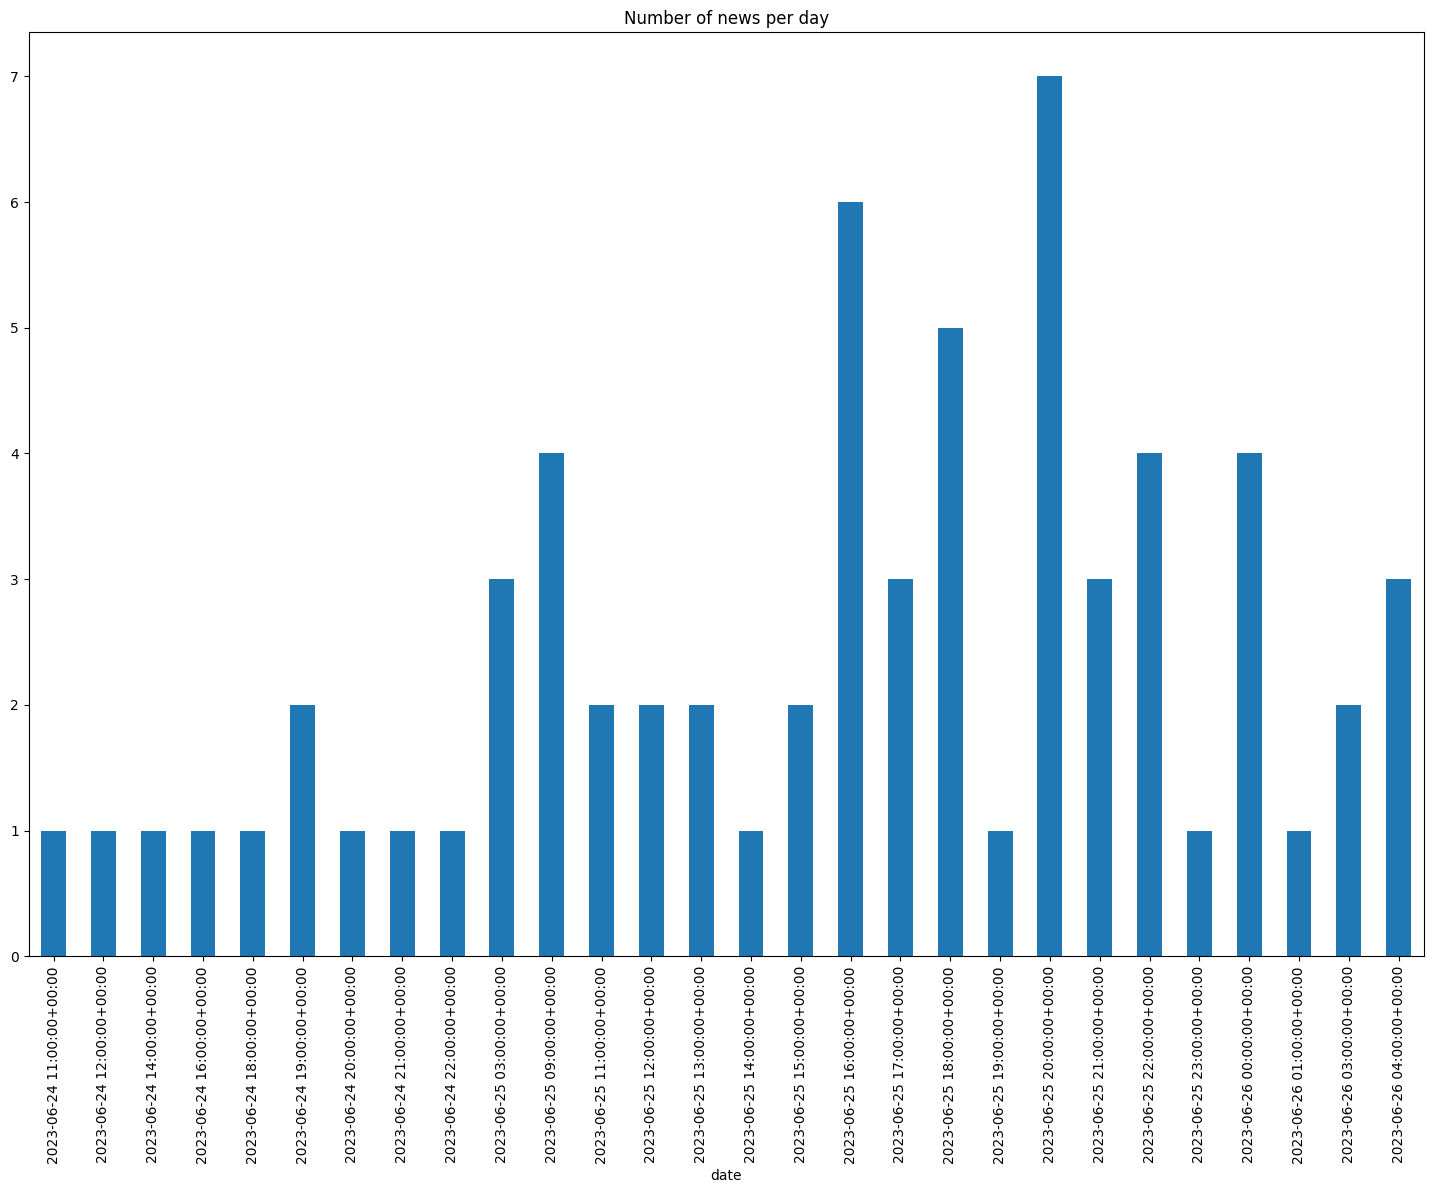

In [115]:
trend_df = headline_df.groupby(by='date').mean()

from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

headline_df.groupby(by='date').count()['title'].plot(kind='bar', figsize=(18,12))
plt.title('Number of news per day')
plt.show()

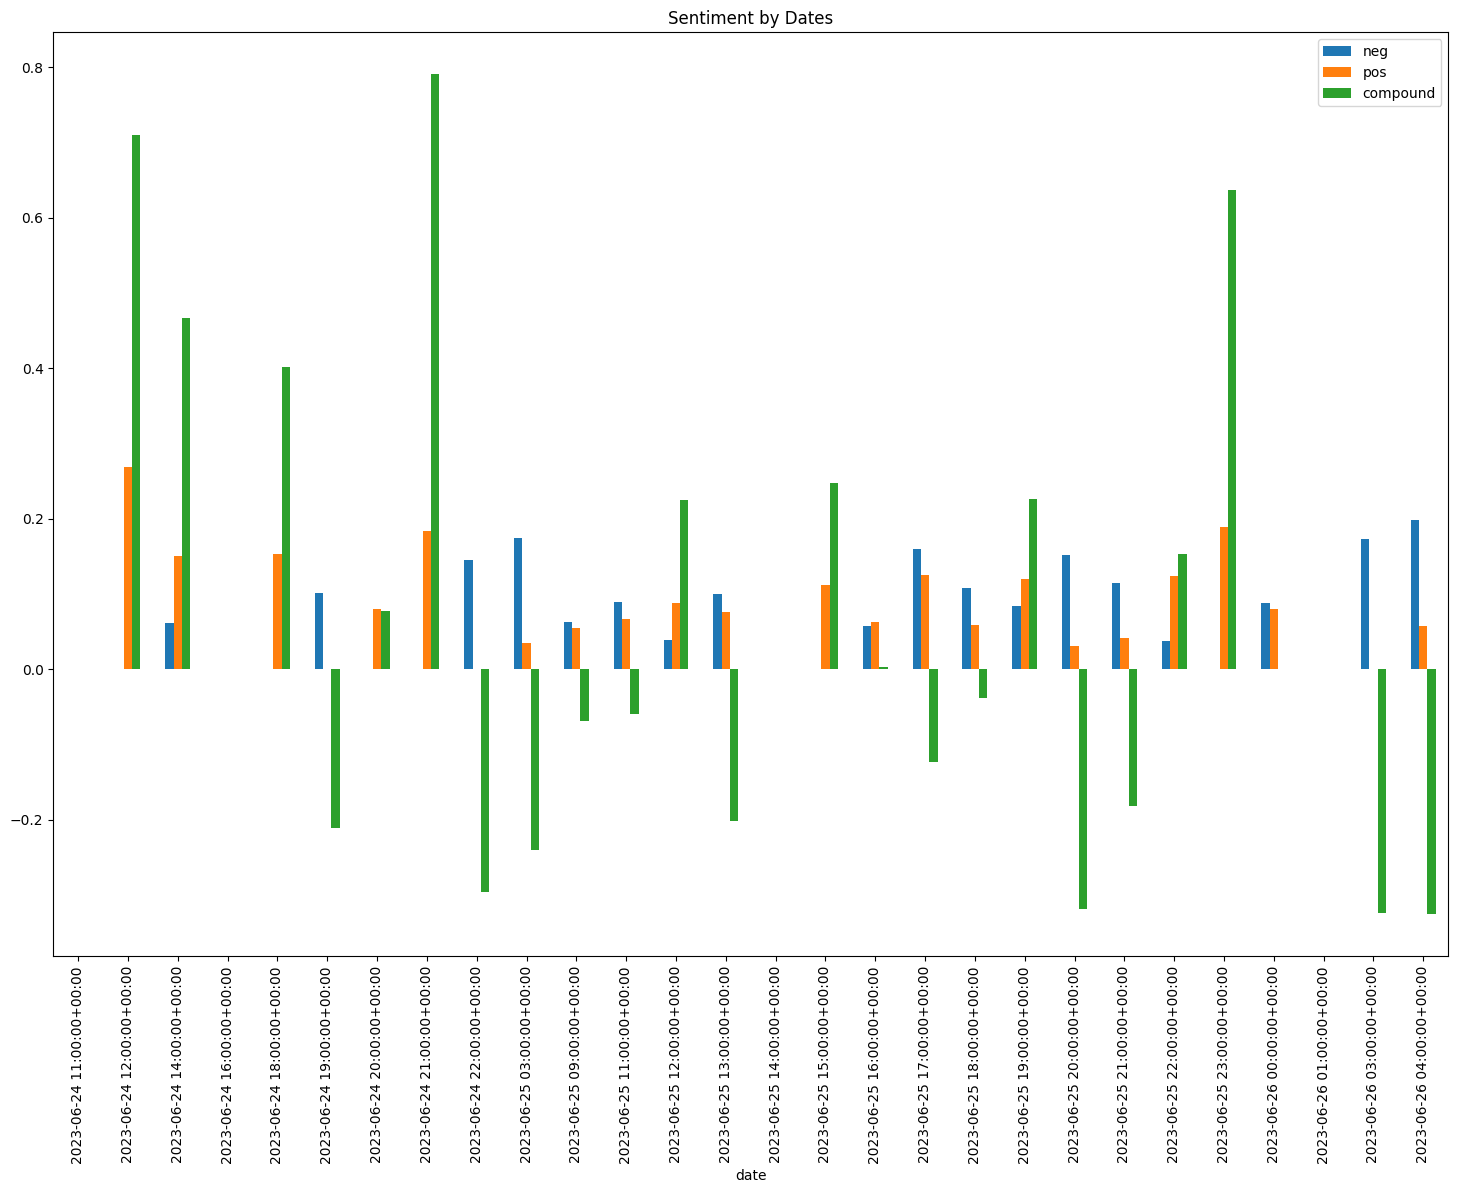

In [116]:
trend_df[['neg', 'pos', 'compound']].groupby(by='date').mean().plot(kind='bar', figsize=(18,12))
plt.title('Sentiment by Dates')
plt.show()

In [14]:
import plotly.graph_objects as go

def plot_gauge(search, value, reference=-1):
  fig = go.Figure(go.Indicator(
      domain = {'x': [0, 1], 'y': [0, 1]},
      value = value,
      mode = "gauge+number+delta",
      title = {'text': "{} FEAR & GREED".format(search)},
      delta = {'reference': reference} if reference != -1 else {'reference': value},
      gauge = {'axis': {'range': [None, 100]},
              'bar': {'color': "lightblue", 'thickness':0.3},
              'steps' : [
                  {'range': [75, 100], 'color': "#79fc74"},
                  {'range': [55, 75], 'color': "#a2fac8"},
                  {'range': [45, 55], 'color': "#f9fa9d"},
                  {'range': [25, 45], 'color': "#ffcf87"},
                  {'range': [0, 25], 'color': "#ff8e8a"}],
              }))
  fig.show()

,source,author,title,description,url,urlToImage,publishedAt,content,date,neg,neu,pos,compound,subjectivity
0,"{'id': None, 'name': 'KSL.com'}",https://www.facebook.com/kslcom/,Drive-thrus are creating problems for cities a...,Sugar House is one many places addressing prob...,https://www.ksl.com/article/50673749/drive-thr...,https://img.ksl.com/slc/2936/293609/29360950.j...,2023-06-26T04:24:50Z,Estimated read time: 5-6\r\n minutes\r\nNEW YO...,2023-06-26 04:00:00+00:00,0.209,0.620,0.171,-0.1280,0.000000
1,"{'id': 'the-wall-street-journal', 'name': 'The...",David Wainer,Pill for Obesity Has Wall Street Salivating - ...,Obesity treatments are currently limited to in...,https://www.wsj.com/articles/pill-for-obesity-...,https://images.wsj.net/im-804363/social,2023-06-26T04:01:00Z,0,2023-06-26 04:00:00+00:00,0.000,1.000,0.000,0.0000,0.000000
2,"{'id': 'the-wall-street-journal', 'name': 'The...",Raffaele Huang,China's 'Tesla Killer' Stumbles as EV Price Wa...,NIO is among Chinese startups burning more cas...,https://www.wsj.com/articles/chinas-tesla-kill...,https://images.wsj.net/im-800982/social,2023-06-26T04:01:00Z,0,2023-06-26 04:00:00+00:00,0.387,0.613,0.000,-0.8481,0.000000
3,"{'id': None, 'name': 'BBC News'}",https://www.facebook.com/bbcnews,PwC Australia: Accounting giant splits busines...,The accounting giant will sell its Australian ...,https://www.bbc.com/news/business-66016270,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-06-26T03:41:04Z,PwC Australia says it will sell its government...,2023-06-26 03:00:00+00:00,0.346,0.654,0.000,-0.6486,1.000000
4,"{'id': None, 'name': 'Yahoo Entertainment'}",Yongchang Chin,Oil Fluctuates After Russia Mutiny Rattles Key...,(Bloomberg) -- Oil advanced as investors weigh...,https://finance.yahoo.com/news/oil-advances-in...,https://s.yimg.com/ny/api/res/1.2/Z9nh7ED9VzgZ...,2023-06-26T03:26:00Z,(Bloomberg) -- Oil advanced as investors weigh...,2023-06-26 03:00:00+00:00,0.000,1.000,0.000,0.0000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,"{'id': None, 'name': 'Common Dreams'}",https://www.facebook.com/32109457015,Analysts Say Solar Is Saving Texans From Wides...,"""Renewables are definitely saving the grid and...",https://www.commondreams.org/news/solar-power-...,https://www.commondreams.org/media-library/an-...,2023-06-24T18:26:34Z,A sweltering heatwave has gripped Texas over t...,2023-06-24 18:00:00+00:00,0.000,0.847,0.153,0.4019,0.750000
62,"{'id': None, 'name': 'Simple Flying'}",Channing Reid,Airshows To Look Forward To In The Rest Of 202...,Missed the Paris Air Show? No need to worry – ...,https://simpleflying.com/airshows-2023/,https://static1.simpleflyingimages.com/wordpre...,2023-06-24T16:00:00Z,With the Paris Air Show roaring back for its 5...,2023-06-24 16:00:00+00:00,0.000,1.000,0.000,0.0000,0.357143
63,"{'id': 'the-washington-post', 'name': 'The Was...",Editorial Board,Opinion | Bipartisanship isn't dead. Just look...,Passing the Recoup Act would signal bank leade...,https://www.washingtonpost.com/opinions/2023/0...,https://www.washingtonpost.com/wp-apps/imrs.ph...,2023-06-24T14:00:00Z,Comment on this story\r\nComment\r\nThe region...,2023-06-24 14:00:00+00:00,0.061,0.788,0.151,0.4664,0.200000
64,"{'id': None, 'name': 'Food & Wine'}",https://www.facebook.com/foodandwine,The Best Grill Deals to Shop Ahead of Amazon P...,"Weber, Blackstone, and Cuisinart grills are al...",https://www.foodandwine.com/early-prime-day-gr...,https://www.foodandwine.com/thmb/hAcWxF0K6RxaK...,2023-06-24T12:30:00Z,My dad used to tell this story about how he he...,2023-06-24 12:00:00+00:00,0.000,0.731,0.269,0.7096,0.200000


In [120]:
# Weekly

plot_gauge('Weekly\n',
           headline_df['compound'].mean() * 100 + 50)


In [ ]:
# WordCloud

all_words = ' '.join([x for x in headline_df['title']])
stop_words = ['amp', 'the', 'a', 'to', 'of', 'i', 'this', "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

word_cloud = WordCloud(width=1200, height=800, background_color='white', stopwords=stop_words).generate(all_words)

plt.figure(figsize=(18,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
everything_df = api.get_everything(q='nasdaq', language='en', page_size=100, from_param='2023-06-25', to='2023-06-27')
everything_df = pd.DataFrame(everything_df['articles'])

In [50]:
everything_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'google-news', 'name': 'Google News'}",None,Best Tools to Easily Manage Business Finances ...,Best Tools to Easily Manage Business Finances ...,https://consent.google.com/ml?continue=https:/...,None,2023-06-25T11:00:00Z,We use cookies and data to<ul><li>Deliver and ...
1,"{'id': None, 'name': 'Motley Fool'}",newsfeedback@fool.com (David Moadel),"If You Invested $1,000 in Nikola Stock 3 Years...",It's been a bumpy ride for Nikola's loyal shar...,https://www.fool.com/investing/2023/06/25/if-y...,https://g.foolcdn.com/editorial/images/737289/...,2023-06-25T10:41:00Z,Electric truck manufacturer Nikola (NKLA -6.52...
2,"{'id': 'google-news', 'name': 'Google News'}",None,This Tech Sector Should Surge 60% in 3 Years: ...,This Tech Sector Should Surge 60% in 3 Years: ...,https://consent.google.com/ml?continue=https:/...,None,2023-06-25T11:09:00Z,We use cookies and data to<ul><li>Deliver and ...
3,"{'id': None, 'name': 'Motley Fool'}",newsfeedback@fool.com (Sean Williams),New Bull Market? 1 Widely Followed Economic In...,Claims that we've entered a new bull market ma...,https://www.fool.com/investing/2023/06/25/new-...,https://g.foolcdn.com/editorial/images/737295/...,2023-06-25T09:06:00Z,One of the few guarantees investors are given ...
4,"{'id': None, 'name': 'Yahoo Entertainment'}",Jessica Menton and Elena Popina,Where Stock Market Is Headed After Wild First ...,(Bloomberg) -- As a dizzying first half for US...,https://finance.yahoo.com/news/where-stock-mar...,https://media.zenfs.com/en/bloomberg_markets_8...,2023-06-25T14:00:00Z,(Bloomberg) -- As a dizzying first half for US...
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'GlobeNewswire'}",Pomerantz LLP,SHAREHOLER ALERT: Pomerantz Law Firm Reminds S...,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po...",https://www.globenewswire.com/news-release/202...,None,2023-06-26T02:08:00Z,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po..."
96,"{'id': None, 'name': 'GlobeNewswire'}",Pomerantz LLP,SHAREHOLDER ALERT: Pomerantz Law Firm Reminds ...,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po...",https://www.globenewswire.com/news-release/202...,None,2023-06-26T03:31:00Z,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po..."
97,"{'id': None, 'name': 'GlobeNewswire'}",Pomerantz LLP,SHAREHOLDER ALERT: Pomerantz Law Firm Reminds ...,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po...",https://www.globenewswire.com/news-release/202...,None,2023-06-26T03:59:00Z,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po..."
98,"{'id': None, 'name': 'GlobeNewswire'}",Pomerantz LLP,SHAREHOLDER ALERT: Pomerantz Law Firm Reminds ...,"NEW YORK, June 26, 2023 (GLOBE NEWSWIRE) -- Po...",https://www.globenewswire.com/news-release/202...,None,2023-06-26T04:06:00Z,"NEW YORK, June 26, 2023 (GLOBE NEWSWIRE) -- Po..."


In [51]:
everything_df['date'] = pd.to_datetime(everything_df['publishedAt'])
everything_df['date'] = everything_df['date'].dt.floor('12H')

In [52]:
analyzer = SentimentIntensityAnalyzer()

# Vader Polarity
everything_df = pd.concat([everything_df, pd.DataFrame([analyzer.polarity_scores(text) for text in everything_df['title']])], axis=1)

# TextBlob Sebjectivity
everything_df['subjectivity'] = [TextBlob(text).sentiment.subjectivity for text in everything_df['title']]
everything_df = everything_df.fillna(0)

In [53]:
everything_df

,source,author,title,description,url,urlToImage,publishedAt,content,date,neg,neu,pos,compound,subjectivity
0,"{'id': 'google-news', 'name': 'Google News'}",0,Best Tools to Easily Manage Business Finances ...,Best Tools to Easily Manage Business Finances ...,https://consent.google.com/ml?continue=https:/...,0,2023-06-25T11:00:00Z,We use cookies and data to<ul><li>Deliver and ...,2023-06-25 00:00:00+00:00,0.000,0.515,0.485,0.7650,0.566667
1,"{'id': None, 'name': 'Motley Fool'}",newsfeedback@fool.com (David Moadel),"If You Invested $1,000 in Nikola Stock 3 Years...",It's been a bumpy ride for Nikola's loyal shar...,https://www.fool.com/investing/2023/06/25/if-y...,https://g.foolcdn.com/editorial/images/737289/...,2023-06-25T10:41:00Z,Electric truck manufacturer Nikola (NKLA -6.52...,2023-06-25 00:00:00+00:00,0.000,1.000,0.000,0.0000,0.200000
2,"{'id': 'google-news', 'name': 'Google News'}",0,This Tech Sector Should Surge 60% in 3 Years: ...,This Tech Sector Should Surge 60% in 3 Years: ...,https://consent.google.com/ml?continue=https:/...,0,2023-06-25T11:09:00Z,We use cookies and data to<ul><li>Deliver and ...,2023-06-25 00:00:00+00:00,0.000,0.862,0.138,0.3400,1.000000
3,"{'id': None, 'name': 'Motley Fool'}",newsfeedback@fool.com (Sean Williams),New Bull Market? 1 Widely Followed Economic In...,Claims that we've entered a new bull market ma...,https://www.fool.com/investing/2023/06/25/new-...,https://g.foolcdn.com/editorial/images/737295/...,2023-06-25T09:06:00Z,One of the few guarantees investors are given ...,2023-06-25 00:00:00+00:00,0.000,1.000,0.000,0.0000,0.351515
4,"{'id': None, 'name': 'Yahoo Entertainment'}",Jessica Menton and Elena Popina,Where Stock Market Is Headed After Wild First ...,(Bloomberg) -- As a dizzying first half for US...,https://finance.yahoo.com/news/where-stock-mar...,https://media.zenfs.com/en/bloomberg_markets_8...,2023-06-25T14:00:00Z,(Bloomberg) -- As a dizzying first half for US...,2023-06-25 12:00:00+00:00,0.000,1.000,0.000,0.0000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'GlobeNewswire'}",Pomerantz LLP,SHAREHOLER ALERT: Pomerantz Law Firm Reminds S...,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po...",https://www.globenewswire.com/news-release/202...,0,2023-06-26T02:08:00Z,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po...",2023-06-26 00:00:00+00:00,0.156,0.745,0.099,-0.1697,0.250000
96,"{'id': None, 'name': 'GlobeNewswire'}",Pomerantz LLP,SHAREHOLDER ALERT: Pomerantz Law Firm Reminds ...,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po...",https://www.globenewswire.com/news-release/202...,0,2023-06-26T03:31:00Z,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po...",2023-06-26 00:00:00+00:00,0.156,0.745,0.099,-0.1697,0.250000
97,"{'id': None, 'name': 'GlobeNewswire'}",Pomerantz LLP,SHAREHOLDER ALERT: Pomerantz Law Firm Reminds ...,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po...",https://www.globenewswire.com/news-release/202...,0,2023-06-26T03:59:00Z,"NEW YORK, June 25, 2023 (GLOBE NEWSWIRE) -- Po...",2023-06-26 00:00:00+00:00,0.156,0.745,0.099,-0.1697,0.250000
98,"{'id': None, 'name': 'GlobeNewswire'}",Pomerantz LLP,SHAREHOLDER ALERT: Pomerantz Law Firm Reminds ...,"NEW YORK, June 26, 2023 (GLOBE NEWSWIRE) -- Po...",https://www.globenewswire.com/news-release/202...,0,2023-06-26T04:06:00Z,"NEW YORK, June 26, 2023 (GLOBE NEWSWIRE) -- Po...",2023-06-26 00:00:00+00:00,0.156,0.745,0.099,-0.1697,0.166667


In [29]:
trend_df = everything_df.groupby(by='date').mean()

from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

<ipython-input-29-e88b3fc12f3a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



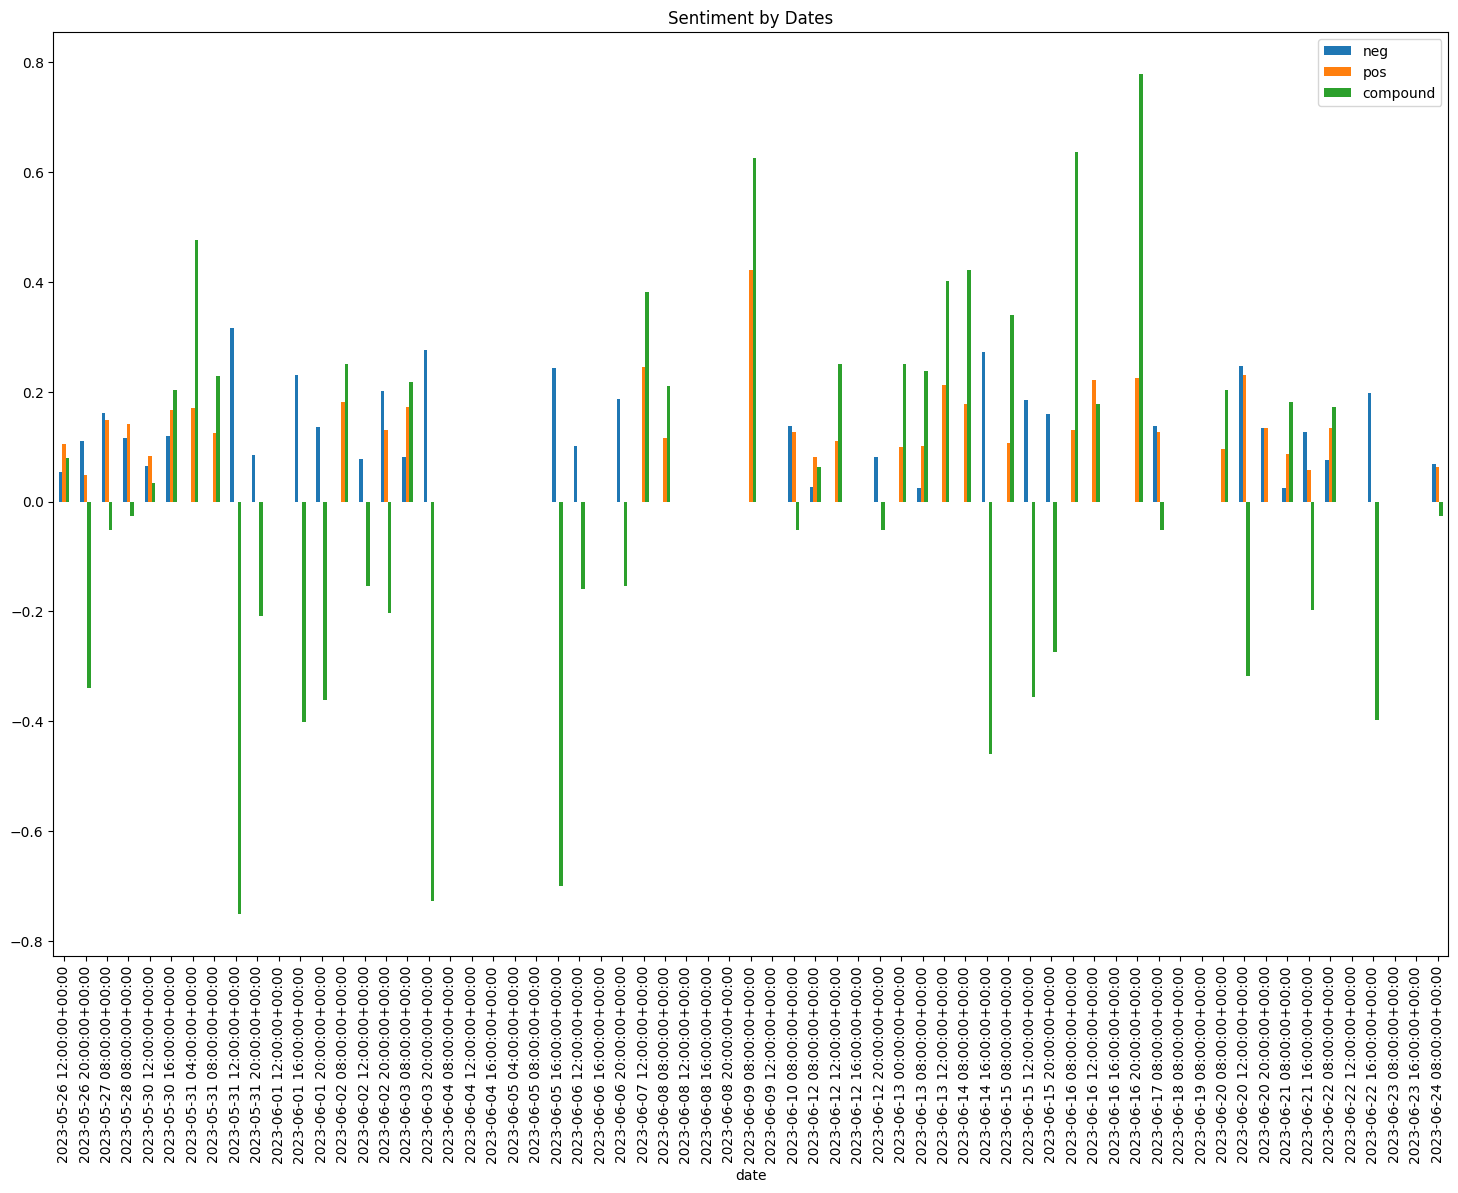

In [30]:
trend_df[['neg', 'pos', 'compound']].groupby(by='date').mean().plot(kind='bar', figsize=(18,12))
plt.title('Sentiment by Dates')
plt.show()